# LIZ ILEANA RODRÍGUEZ GÁMEZ

18-02-2023

# Analizando las estadísticas de jugadores de futbol con Pandas

![FIFA](https://upload.wikimedia.org/wikipedia/commons/thumb/a/aa/FIFA_logo_without_slogan.svg/1200px-FIFA_logo_without_slogan.svg.png)

En esta notebook, utilizarás Pandas para analizar datos de jugadores de futbol (soccer). Los datos se encuentran en forma tabular e incluyen información relevante de jugadores de futbol de todo el mundo.

---


Cada fila en el conjunto de datos contiene información sobre el jugador:
* Información personal: Nombre, nacionalidad, , edad, altura, peso y pierna preferida al jugar.
* Información como jugador: Nombre del equipo en el que juega (Club), número de playera, posición en el campo (abreviada), valor comercial y salario.
* Información sobre sus habilidades como jugador (0-100): Overall, Potential, Shooting, Defense, Passing, Physical, Control, Mental y GoalKeeping.


Durante la notebook llevarás a cabo tareas de tratamiento y análisis exploratorio de datos comunmente realizadas. Buscarás información que podría resultar útil para las organizaciones.



---



Recuerda que puedes acudir a la [documentación de Pandas](https://pandas.pydata.org/pandas-docs/stable/reference/index.html) o a la notebook de Pandas del diplomado en ciencia de datos.



Primero, importa Pandas en tu notebook:

In [ ]:
# pandas usando el alias pd
import pandas as pd

Ejecuta la siguiente celda para cargar el conjunto de datos desde el repositorio en github a la máquina en colab.

In [ ]:
# Fetch the dataset using the raw GitHub URL.
!curl --remote-name \
     -H 'Accept: application/vnd.github.v3.raw' \
     --location https://raw.githubusercontent.com/DCDPUAEM/DCDP/main/01%20Programaci%C3%B3n%20en%20Python/data/fifa/players.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 1955k  100 1955k    0     0  6411k      0 --:--:-- --:--:-- --:--:-- 6411k


Veamos las primeras líneas del archivo usando un comando de linux en la celda de colab:

In [ ]:
!head -n 5 players.csv

ID,Name,Nationality,Club,Jersey Number,Value,Wage,Age,Height,Weight,Preferred Foot,Position,Overall,Potential,Shooting,Defense,Passing,Physical,Control,Mental,GoalKeeping
158023,L. Messi,Argentina,FC Barcelona,10.0,€110.5M,€565K,31,5'7,159lbs,Left,RF,94,94,86,41,87,80,96,95,11
20801,Cristiano Ronaldo,Portugal,Juventus,7.0,€77M,€405K,33,6'2,183lbs,Right,ST,94,94,88,41,81,86,84,91,12
190871,Neymar Jr,Brazil,Paris Saint-Germain,10.0,€118.5M,€290K,26,5'9,150lbs,Right,LW,92,93,81,42,80,79,92,92,12
193080,De Gea,Spain,Manchester United,1.0,€72M,€260K,27,6'4,168lbs,Right,GK,91,93,21,18,39,56,34,75,89


## Carga el conjunto de datos FIFA usando pandas

In [ ]:
# leer el dataframe usando read_csv
#formato separado por comas, la primera fila son los encabezados de columan 

fifa_df = pd.read_csv("/content/players.csv", sep=',', header=0)
# mostrar los primeros elementos con head
fifa_df.head()

,ID,Name,Nationality,Club,Jersey Number,Value,Wage,Age,Height,Weight,...,Position,Overall,Potential,Shooting,Defense,Passing,Physical,Control,Mental,GoalKeeping
0,158023,L. Messi,Argentina,FC Barcelona,10.0,€110.5M,€565K,31,5'7,159lbs,...,RF,94,94,86.0,41.0,87.0,80.0,96.0,95.0,11.0
1,20801,Cristiano Ronaldo,Portugal,Juventus,7.0,€77M,€405K,33,6'2,183lbs,...,ST,94,94,88.0,41.0,81.0,86.0,84.0,91.0,12.0
2,190871,Neymar Jr,Brazil,Paris Saint-Germain,10.0,€118.5M,€290K,26,5'9,150lbs,...,LW,92,93,81.0,42.0,80.0,79.0,92.0,92.0,12.0
3,193080,De Gea,Spain,Manchester United,1.0,€72M,€260K,27,6'4,168lbs,...,GK,91,93,21.0,18.0,39.0,56.0,34.0,75.0,89.0
4,192985,K. De Bruyne,Belgium,Manchester City,7.0,€102M,€355K,27,5'11,154lbs,...,RCM,91,92,81.0,65.0,92.0,77.0,85.0,91.0,11.0


## Características del dataset

¿Qué tipos de datos contiene nuestro dataframe?

In [ ]:
fifa_df.columns

Index(['ID', 'Name', 'Nationality', 'Club', 'Jersey Number', 'Value', 'Wage',
       'Age', 'Height', 'Weight', 'Preferred Foot', 'Position', 'Overall',
       'Potential', 'Shooting', 'Defense', 'Passing', 'Physical', 'Control',
       'Mental', 'GoalKeeping'],
      dtype='object')

In [ ]:
fifa_df.dtypes

ID                  int64
Name               object
Nationality        object
Club               object
Jersey Number     float64
Value              object
Wage               object
Age                 int64
Height             object
Weight             object
Preferred Foot     object
Position           object
Overall             int64
Potential           int64
Shooting          float64
Defense           float64
Passing           float64
Physical          float64
Control           float64
Mental            float64
GoalKeeping       float64
dtype: object

In [ ]:
fifa_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ID              18207 non-null  int64  
 1   Name            18207 non-null  object 
 2   Nationality     18207 non-null  object 
 3   Club            17966 non-null  object 
 4   Jersey Number   18147 non-null  float64
 5   Value           18207 non-null  object 
 6   Wage            18207 non-null  object 
 7   Age             18207 non-null  int64  
 8   Height          18159 non-null  object 
 9   Weight          18159 non-null  object 
 10  Preferred Foot  18159 non-null  object 
 11  Position        18147 non-null  object 
 12  Overall         18207 non-null  int64  
 13  Potential       18207 non-null  int64  
 14  Shooting        18159 non-null  float64
 15  Defense         18159 non-null  float64
 16  Passing         18159 non-null  float64
 17  Physical        18159 non-null 

In [ ]:
for name, t in zip(fifa_df.columns, fifa_df.dtypes):
  print(name, t)

ID int64
Name object
Nationality object
Club object
Jersey Number float64
Value object
Wage object
Age int64
Height object
Weight object
Preferred Foot object
Position object
Overall int64
Potential int64
Shooting float64
Defense float64
Passing float64
Physical float64
Control float64
Mental float64
GoalKeeping float64


¿Qué tamaño tiene nuestro dataset?

Utiliza el método ```shape``` para conocer el número de filas y columnas en el dataframe.

In [ ]:
m,n = fifa_df.shape
print("Filas:", m)
print("Columnas:", n)

Filas: 18207
Columnas: 21


In [ ]:
assert m == 18207 and n == 21, "Error en las dimensiones"

### Estadísticas generales del dataset.

Usa ```describre()``` para mostrar las estadísticas generales de las columnas numéricas en el dataframe.

In [ ]:
fifa_df.describe()

,ID,Jersey Number,Age,Overall,Potential,Shooting,Defense,Passing,Physical,Control,Mental,GoalKeeping
count,18207.000000,18147.000000,18207.000000,18207.000000,18207.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000
mean,214298.338606,19.546096,25.122206,66.238699,71.307299,47.736274,47.459001,53.710612,64.344512,59.236357,57.958974,16.468087
std,29965.244204,15.947765,4.669943,6.908930,6.136496,15.621702,17.314439,15.113052,9.839120,15.156389,9.933340,17.002775
min,16.000000,1.000000,16.000000,46.000000,48.000000,7.000000,7.000000,8.000000,22.000000,12.000000,25.000000,1.000000
25%,200315.500000,8.000000,21.000000,62.000000,67.000000,39.000000,35.000000,46.000000,60.000000,54.000000,51.000000,10.000000
50%,221759.000000,17.000000,25.000000,66.000000,71.000000,50.000000,52.000000,57.000000,66.000000,63.000000,58.000000,11.000000
75%,236529.500000,26.000000,28.000000,71.000000,75.000000,59.000000,61.000000,64.000000,71.000000,69.000000,65.000000,12.000000
max,246620.000000,99.000000,45.000000,94.000000,95.000000,88.000000,86.000000,92.000000,89.000000,96.000000,95.000000,89.000000


## Tratamiento de datos


### Datos faltantes

Antes de poder hacer transformaciones y operaciones en los datos, es importante identificar la posible existencia de datos faltantes. El método ```isna()``` de pandas, permite obtener un dataframe booleano que identifica entradas faltantes. 

Usémos ```isna()```, ```sum(axis=0)``` y ```to_frame().T``` para resumir el resultado de datos faltantes como un conteo por columnas:

In [ ]:
fifa_df.isna()

,ID,Name,Nationality,Club,Jersey Number,Value,Wage,Age,Height,Weight,...,Position,Overall,Potential,Shooting,Defense,Passing,Physical,Control,Mental,GoalKeeping
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
18203,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
18204,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
18205,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
fifa_df.isna().sum(axis=0).to_frame().T

,ID,Name,Nationality,Club,Jersey Number,Value,Wage,Age,Height,Weight,...,Position,Overall,Potential,Shooting,Defense,Passing,Physical,Control,Mental,GoalKeeping
0,0,0,0,241,60,0,0,0,48,48,...,60,0,0,48,48,48,48,48,48,48


Una manera de tratar con datos faltantes, es eliminar las filas que contienen uno o más datos faltantes, dejando solo registros completos.

Ya que para nuestro conjunto de datos la cantidad de faltantes es mínima, podemos usar esta estrategia.

Completa la siguiente celda para eliminar filas (```axis=0```) que contengan algún dato faltante (```dropna```):

In [ ]:
# quitando los registros con NaN
t_df = fifa_df.dropna(axis=0)

In [ ]:
t_df

,ID,Name,Nationality,Club,Jersey Number,Value,Wage,Age,Height,Weight,...,Position,Overall,Potential,Shooting,Defense,Passing,Physical,Control,Mental,GoalKeeping
0,158023,L. Messi,Argentina,FC Barcelona,10.0,€110.5M,€565K,31,5'7,159lbs,...,RF,94,94,86.0,41.0,87.0,80.0,96.0,95.0,11.0
1,20801,Cristiano Ronaldo,Portugal,Juventus,7.0,€77M,€405K,33,6'2,183lbs,...,ST,94,94,88.0,41.0,81.0,86.0,84.0,91.0,12.0
2,190871,Neymar Jr,Brazil,Paris Saint-Germain,10.0,€118.5M,€290K,26,5'9,150lbs,...,LW,92,93,81.0,42.0,80.0,79.0,92.0,92.0,12.0
3,193080,De Gea,Spain,Manchester United,1.0,€72M,€260K,27,6'4,168lbs,...,GK,91,93,21.0,18.0,39.0,56.0,34.0,75.0,89.0
4,192985,K. De Bruyne,Belgium,Manchester City,7.0,€102M,€355K,27,5'11,154lbs,...,RCM,91,92,81.0,65.0,92.0,77.0,85.0,91.0,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,238813,J. Lundstram,England,Crewe Alexandra,22.0,€60K,€1K,19,5'9,134lbs,...,CM,47,65,36.0,44.0,43.0,56.0,54.0,49.0,9.0
18203,243165,N. Christoffersson,Sweden,Trelleborgs FF,21.0,€60K,€1K,19,6'3,170lbs,...,ST,47,63,40.0,24.0,30.0,47.0,44.0,38.0,9.0
18204,241638,B. Worman,England,Cambridge United,33.0,€60K,€1K,16,5'8,148lbs,...,ST,47,67,42.0,24.0,30.0,56.0,49.0,44.0,8.0
18205,246268,D. Walker-Rice,England,Tranmere Rovers,34.0,€60K,€1K,17,5'10,154lbs,...,RW,47,66,43.0,28.0,39.0,53.0,58.0,38.0,10.0


In [ ]:
t_df.shape

(17918, 21)

In [ ]:
print(t_df.shape, fifa_df.shape)

(17918, 21) (18207, 21)


Verifica que no hay más datos faltantes:

In [ ]:
empty_columns = t_df.isna().sum(axis=0).to_frame().T
empty_columns

,ID,Name,Nationality,Club,Jersey Number,Value,Wage,Age,Height,Weight,...,Position,Overall,Potential,Shooting,Defense,Passing,Physical,Control,Mental,GoalKeeping
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
assert empty_columns.values.sum() == 0, "Error, aun hay datos faltantes"

Finalmente, reemplazar el dataframe original por el nuevo sin elementos faltantes.

In [ ]:
# Debes estar segura que ya limpiaste y trabajaras con el nuevo dataframe, ya no te haran falta más datos.
fifa_df = t_df

### Transformaciones

Las celdas fueron inferidas como tipo ```object``` por pandas. Algunas de éstas contienen datos numéricos que podrían ser útiles para el análisis. 

Por ejemplo, las columnas ```Wage``` y ```Value``` contienen datos sobre el salario y el valor en el mercado de cada jugador. Ambas columnas contienen el signo de la moneda (€) al inicio y al final pueden contener la abreviación de cantidades (K miles, M millones). 

Debemos realizar un tratamiento de datos en tales columnas para poder usarlas de manera numérica.

Primero, confirmemos que solo tenemos casos donde las cantidades terminan en K, M o sin abreviaturas. Usemos funciones de agregación.

Contemos las veces que aparecen los distintos caracteres al final de los registros en la columna ```Wage```:

In [ ]:
# str[-1] hace referencia al último caracter y str[-2] al penultimo caracter, etc.
# str[-1] imprime el caracter "Wage" pero deja el último elemento... se concentra en el último elemento para hacer el conteo de cuántas veces aparece el utltimo elemento de la cadena.

fifa_df[["Wage"]].groupby(fifa_df.Wage.str[-1]).count()


,Wage
Wage,
K,17918


In [ ]:
s = '$650K'
# Primer carácter de la cadena
s[:-1]


'$650'

Contemos las veces que aparecen los distintos caracteres al final de los registros en la columna ```Value```:

In [ ]:
fifa_df[["Value"]].groupby(fifa_df.Value.str[-1]).count()

,Value
Value,
0,11
K,11060
M,6847


In [ ]:
def currency_to_numeric(currency):
  """
  La funcion recibe valores monetarios en un objeto de texto, los tranforma:
  1- Elimina el simbolo de la moneda al inicio de la cadena
  2- Extrae el caracter adicional al final de la cadena que indica el
     multiplo de la cantidad (abreviatura). No siempre hay un simbolo.
  3- Usa el valor para devolver la cantidad en numero (multiplica por el valor).
  Ej: 250K pasa a 250000
  ya que
  1K = 1000
  1M = 1000000
  Sin letra solo parte numerica
  """
  # el multiplo de K o M
  symbols = {"K": 1000, "M": 1000000}
  # Actualiza el valor de numeric con la cantidad en currency
  numeric = 0.0

  val = currency[-1]         # para contemplar si tiene K o M
  val1 = currency[1:]        # para contemplar el simbolo inicial (ej. $, euro, etc.)

  if val in symbols:
    numeric = float(val1[:-1])*symbols[val]
  else: 
    numeric = float(val1)

  return numeric

Prueba tu función:

In [ ]:
currency_to_numeric("$20M")

20000000.0

In [ ]:
assert currency_to_numeric("$20") == 20.0 and currency_to_numeric("$50K") == 50*10.0**3 and currency_to_numeric("$10M") == 10*10.0**6, "Error"

Cambia las columnas ```Wage``` y ```Value``` a numéricos usando ```currency_to_numeric``` elemento por elemento con ```applymap```:

In [ ]:
fifa_df[["Wage", "Value"]] = fifa_df[["Wage", "Value"]].applymap(currency_to_numeric)
fifa_df.head()


,ID,Name,Nationality,Club,Jersey Number,Value,Wage,Age,Height,Weight,...,Position,Overall,Potential,Shooting,Defense,Passing,Physical,Control,Mental,GoalKeeping
0,158023,L. Messi,Argentina,FC Barcelona,10.0,110500000.0,565000.0,31,5'7,159lbs,...,RF,94,94,86.0,41.0,87.0,80.0,96.0,95.0,11.0
1,20801,Cristiano Ronaldo,Portugal,Juventus,7.0,77000000.0,405000.0,33,6'2,183lbs,...,ST,94,94,88.0,41.0,81.0,86.0,84.0,91.0,12.0
2,190871,Neymar Jr,Brazil,Paris Saint-Germain,10.0,118500000.0,290000.0,26,5'9,150lbs,...,LW,92,93,81.0,42.0,80.0,79.0,92.0,92.0,12.0
3,193080,De Gea,Spain,Manchester United,1.0,72000000.0,260000.0,27,6'4,168lbs,...,GK,91,93,21.0,18.0,39.0,56.0,34.0,75.0,89.0
4,192985,K. De Bruyne,Belgium,Manchester City,7.0,102000000.0,355000.0,27,5'11,154lbs,...,RCM,91,92,81.0,65.0,92.0,77.0,85.0,91.0,11.0


### Suplementando la información

En el set de datos, tenemos una columna ```Position``` que indica la posición en la que el jugador se desempeña en el campo. Algo que podrás notar, es que originalmente la posición está de manera abreviada, si no conoces las abreviaturas, será complicado saber en qué posición juega cada jugador. 


Para solucionar esto, usémos otro set de datos para cambiar de abreviatura a algo más descriptivo, pero manteniendo la abreviatura.

La siguiente imágen muestra las posiciónes más comunes en el campo:
![Posiciones de juego](https://raw.githubusercontent.com/jhermosillo/DIPLOMADO_CDP/main/01%20Programaci%C3%B3n%20en%20Python/images/SoccerFieldPositions.png)


Vamos a utilizar un nuevo set de datos que contiene la abreviatura de cada posición (```Abbreviation```) y su significado (```Full```).

Carga el archivo desde github a colab con la siguiente celda:

In [ ]:
# Fetch the dataset using the raw GitHub URL.
!curl --remote-name \
     -H 'Accept: application/vnd.github.v3.raw' \
     --location https://raw.githubusercontent.com/DCDPUAEM/DCDP/main/01%20Programaci%C3%B3n%20en%20Python/data/fifa/positions.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   772  100   772    0     0   6433      0 --:--:-- --:--:-- --:--:--  6433


Ejecuta la siguiente celda para crear y ver el nuevo dataframe con los datos de las posiciones:

In [ ]:
positions_df = pd.read_csv("positions.csv", header=0, skipinitialspace=True)
positions_df.head()

,Abbreviation,Full
0,GK,Goalkeeper
1,SW,Sweeper
2,CB,Center Back
3,LCB,Left Center Back
4,RCB,Right Center Back


Utiliza el nuevo dataframe para actualizar la columna ```Position``` en el dataframe de jugadores por la posición descriptiva + abreviada.

Primero, debemos de *unir* ambos dataframes, ambos comparten una columna (pero tienen diferentes nombre) la posición abreviada.

Utiliza un método de pandas para unir el dataframe ```fifa_df``` con ```positions_df```.

*Tip: Queremos unir cada fila de la **izquierda** (cada jugador) con una sola fila de la **derecha** (su posición completa en el campo).*

In [ ]:
fifa_df["Position"].value_counts()

ST     2130
GK     1992
CB     1754
CM     1377
LB     1305
RB     1268
RM     1114
LM     1086
CAM     948
CDM     936
RCB     652
LCB     637
LCM     389
RCM     387
LW      374
RW      365
RDM     246
LDM     239
LS      206
RS      201
RWB      87
LWB      78
CF       74
LAM      21
RAM      21
RF       16
LF       15
Name: Position, dtype: int64

In [ ]:
merged_df = fifa_df.merge(positions_df, how="inner", left_on="Position", right_on="Abbreviation")
merged_df.head()

,ID,Name,Nationality,Club,Jersey Number,Value,Wage,Age,Height,Weight,...,Potential,Shooting,Defense,Passing,Physical,Control,Mental,GoalKeeping,Abbreviation,Full
0,158023,L. Messi,Argentina,FC Barcelona,10.0,110500000.0,565000.0,31,5'7,159lbs,...,94,86.0,41.0,87.0,80.0,96.0,95.0,11.0,RF,Right Forward
1,175943,D. Mertens,Belgium,Napoli,14.0,45000000.0,135000.0,31,5'7,134lbs,...,87,74.0,46.0,78.0,77.0,91.0,84.0,8.0,RF,Right Forward
2,172114,D. Valeri,Argentina,Portland Timbers,8.0,11500000.0,12000.0,32,5'10,165lbs,...,80,79.0,46.0,78.0,69.0,78.0,82.0,12.0,RF,Right Forward
3,150516,L. Podolski,Germany,Vissel Kobe,10.0,6500000.0,11000.0,33,6'0,183lbs,...,78,80.0,49.0,73.0,73.0,75.0,78.0,11.0,RF,Right Forward
4,201313,C. Ciano,Italy,Frosinone,28.0,6500000.0,17000.0,28,5'9,161lbs,...,75,70.0,32.0,72.0,72.0,77.0,72.0,9.0,RF,Right Forward


In [ ]:
merged_df.head()

,ID,Name,Nationality,Club,Jersey Number,Value,Wage,Age,Height,Weight,...,Potential,Shooting,Defense,Passing,Physical,Control,Mental,GoalKeeping,Abbreviation,Full
0,158023,L. Messi,Argentina,FC Barcelona,10.0,110500000.0,565000.0,31,5'7,159lbs,...,94,86.0,41.0,87.0,80.0,96.0,95.0,11.0,RF,Right Forward
1,175943,D. Mertens,Belgium,Napoli,14.0,45000000.0,135000.0,31,5'7,134lbs,...,87,74.0,46.0,78.0,77.0,91.0,84.0,8.0,RF,Right Forward
2,172114,D. Valeri,Argentina,Portland Timbers,8.0,11500000.0,12000.0,32,5'10,165lbs,...,80,79.0,46.0,78.0,69.0,78.0,82.0,12.0,RF,Right Forward
3,150516,L. Podolski,Germany,Vissel Kobe,10.0,6500000.0,11000.0,33,6'0,183lbs,...,78,80.0,49.0,73.0,73.0,75.0,78.0,11.0,RF,Right Forward
4,201313,C. Ciano,Italy,Frosinone,28.0,6500000.0,17000.0,28,5'9,161lbs,...,75,70.0,32.0,72.0,72.0,77.0,72.0,9.0,RF,Right Forward


In [ ]:
assert len(merged_df.columns) == 23, "Error"
print("La union de ambos dataframes contiene ", len(merged_df.columns), " columnas")

La union de ambos dataframes contiene  23  columnas


Usemos la nueva columna ```Full``` para actualizar la columna ```Position``` para que contenga el significado y abreviatura de la posición:

```merged_df["Full"] + " (" + merged_df["Position"] +")"```

In [ ]:
# es una manera de concatenar la infromación 

merged_df["Position"] = merged_df["Full"] + " (" + merged_df["Position"] +")"


Muestra la columna actualizada:

In [ ]:
merged_df["Position"].head(3)

0    Right Forward (RF)
1    Right Forward (RF)
2    Right Forward (RF)
Name: Position, dtype: object

Ahora, tenemos algunas columnas adicionales que ya no son útiles.

Eliminemos las columnas ```Abbreviation``` y ```Full``` del dataframe usando ```drop()```:

In [ ]:
merged_df = merged_df.drop(["Abbreviation", "Full"], axis=1)

In [ ]:
merged_df.head(3)

,ID,Name,Nationality,Club,Jersey Number,Value,Wage,Age,Height,Weight,...,Position,Overall,Potential,Shooting,Defense,Passing,Physical,Control,Mental,GoalKeeping
0,158023,L. Messi,Argentina,FC Barcelona,10.0,110500000.0,565000.0,31,5'7,159lbs,...,Right Forward (RF),94,94,86.0,41.0,87.0,80.0,96.0,95.0,11.0
1,175943,D. Mertens,Belgium,Napoli,14.0,45000000.0,135000.0,31,5'7,134lbs,...,Right Forward (RF),87,87,74.0,46.0,78.0,77.0,91.0,84.0,8.0
2,172114,D. Valeri,Argentina,Portland Timbers,8.0,11500000.0,12000.0,32,5'10,165lbs,...,Right Forward (RF),80,80,79.0,46.0,78.0,69.0,78.0,82.0,12.0


In [ ]:
assert len(merged_df.columns) == 21, "Error"

Asignemos al dataframe original ```fifa_df``` el nuevo dataframe con el tratamiento de datos ya realizado:

In [ ]:
# sobreescribir el archivo para actualizar el data frame con la informacion ajustada
fifa_df = merged_df
fifa_df.head()

,ID,Name,Nationality,Club,Jersey Number,Value,Wage,Age,Height,Weight,...,Position,Overall,Potential,Shooting,Defense,Passing,Physical,Control,Mental,GoalKeeping
0,158023,L. Messi,Argentina,FC Barcelona,10.0,110500000.0,565000.0,31,5'7,159lbs,...,Right Forward (RF),94,94,86.0,41.0,87.0,80.0,96.0,95.0,11.0
1,175943,D. Mertens,Belgium,Napoli,14.0,45000000.0,135000.0,31,5'7,134lbs,...,Right Forward (RF),87,87,74.0,46.0,78.0,77.0,91.0,84.0,8.0
2,172114,D. Valeri,Argentina,Portland Timbers,8.0,11500000.0,12000.0,32,5'10,165lbs,...,Right Forward (RF),80,80,79.0,46.0,78.0,69.0,78.0,82.0,12.0
3,150516,L. Podolski,Germany,Vissel Kobe,10.0,6500000.0,11000.0,33,6'0,183lbs,...,Right Forward (RF),78,78,80.0,49.0,73.0,73.0,75.0,78.0,11.0
4,201313,C. Ciano,Italy,Frosinone,28.0,6500000.0,17000.0,28,5'9,161lbs,...,Right Forward (RF),75,75,70.0,32.0,72.0,72.0,77.0,72.0,9.0


## Análisis exploratorio

En esta sección, utilizarás distintos métodos de los dataframes de pandas para generar un análisis exploratorio. En un análisis exploratorio, se busca explorar, resumir y entender los datos.

### Jugadores con el mayor valor comercial y jugadores mejores pagados

Muestra el **Top 3** de jugadores con mayor valor (```Value```) en el mercado.

In [ ]:
fifa_df.sort_values("Value", ascending=False).head(3)

,ID,Name,Nationality,Club,Jersey Number,Value,Wage,Age,Height,Weight,...,Position,Overall,Potential,Shooting,Defense,Passing,Physical,Control,Mental,GoalKeeping
2146,190871,Neymar Jr,Brazil,Paris Saint-Germain,10.0,118500000.0,290000.0,26,5'9,150lbs,...,Left Wing (LW),92,93,81.0,42.0,80.0,79.0,92.0,92.0,12.0
0,158023,L. Messi,Argentina,FC Barcelona,10.0,110500000.0,565000.0,31,5'7,159lbs,...,Right Forward (RF),94,94,86.0,41.0,87.0,80.0,96.0,95.0,11.0
4512,192985,K. De Bruyne,Belgium,Manchester City,7.0,102000000.0,355000.0,27,5'11,154lbs,...,Right Center Midfield (RCM),91,92,81.0,65.0,92.0,77.0,85.0,91.0,11.0


Muestra el **Top 3** de jugadores mejores pagados en el mundo (Salarios más altos, ```Wage```).

In [ ]:
fifa_df.sort_values("Wage", ascending=False).head(3)

,ID,Name,Nationality,Club,Jersey Number,Value,Wage,Age,Height,Weight,...,Position,Overall,Potential,Shooting,Defense,Passing,Physical,Control,Mental,GoalKeeping
0,158023,L. Messi,Argentina,FC Barcelona,10.0,110500000.0,565000.0,31,5'7,159lbs,...,Right Forward (RF),94,94,86.0,41.0,87.0,80.0,96.0,95.0,11.0
4914,176580,L. Suárez,Uruguay,FC Barcelona,9.0,80000000.0,455000.0,31,6'0,190lbs,...,Right Side (RS),91,91,86.0,56.0,74.0,81.0,87.0,87.0,31.0
4513,177003,L. Modrić,Croatia,Real Madrid,10.0,67000000.0,420000.0,32,5'8,146lbs,...,Right Center Midfield (RCM),91,91,76.0,74.0,89.0,79.0,92.0,89.0,10.0


### Potencial por alcanzar

Utiliza operaciones Crea una nueva columna que  muestre el potencial por alcanzar ```Potential left``` de cada jugador en el conjunto de datos. El potencial por alcanzar puede ser calculado mediante ```Potential - Overall```.

In [ ]:
fifa_df[["Potential", "Overall"]].describe()


,Potential,Overall
count,17918.000000,17918.000000
mean,71.329334,66.236801
std,6.144098,6.929243
min,48.000000,46.000000
25%,67.000000,62.000000
50%,71.000000,66.000000
75%,75.000000,71.000000
max,95.000000,94.000000


In [ ]:
fifa_df["Potential_left"]= fifa_df["Potential"] - fifa_df["Overall"]
fifa_df.head()

,ID,Name,Nationality,Club,Jersey Number,Value,Wage,Age,Height,Weight,...,Overall,Potential,Shooting,Defense,Passing,Physical,Control,Mental,GoalKeeping,Potential_left
0,158023,L. Messi,Argentina,FC Barcelona,10.0,110500000.0,565000.0,31,5'7,159lbs,...,94,94,86.0,41.0,87.0,80.0,96.0,95.0,11.0,0
1,175943,D. Mertens,Belgium,Napoli,14.0,45000000.0,135000.0,31,5'7,134lbs,...,87,87,74.0,46.0,78.0,77.0,91.0,84.0,8.0,0
2,172114,D. Valeri,Argentina,Portland Timbers,8.0,11500000.0,12000.0,32,5'10,165lbs,...,80,80,79.0,46.0,78.0,69.0,78.0,82.0,12.0,0
3,150516,L. Podolski,Germany,Vissel Kobe,10.0,6500000.0,11000.0,33,6'0,183lbs,...,78,78,80.0,49.0,73.0,73.0,75.0,78.0,11.0,0
4,201313,C. Ciano,Italy,Frosinone,28.0,6500000.0,17000.0,28,5'9,161lbs,...,75,75,70.0,32.0,72.0,72.0,77.0,72.0,9.0,0


### Jóvenes promesa

Utiliza las funciones de Pandas para encontrar el **top 5** de jugadores "promesa" menores de 22 años. Ordena ascendentemente el dataframe según el potencial (```Potential```), potencial por alcanzar (```Potential left```) y su nivel (```Overall ```) actual.

In [ ]:
fifa_df.columns

Index(['ID', 'Name', 'Nationality', 'Club', 'Jersey Number', 'Value', 'Wage',
       'Age', 'Height', 'Weight', 'Preferred Foot', 'Position', 'Overall',
       'Potential', 'Shooting', 'Defense', 'Passing', 'Physical', 'Control',
       'Mental', 'GoalKeeping', 'Potential_left'],
      dtype='object')

In [ ]:
# seleccion booleana

fifa_df[fifa_df["Age"]<22].sort_values(by=['Potential', 'Potential_left', 'Overall'], ascending=True).head(5)


,ID,Name,Nationality,Club,Jersey Number,Value,Wage,Age,Height,Weight,...,Overall,Potential,Shooting,Defense,Passing,Physical,Control,Mental,GoalKeeping,Potential_left
16380,241657,D. Horton,England,Lincoln City,33.0,40000.0,1000.0,18,6'1,179lbs,...,48,55,36.0,47.0,46.0,60.0,50.0,44.0,12.0,7
10017,233945,Wu Wei,China PR,Tianjin Quanjian FC,2.0,60000.0,2000.0,21,6'1,176lbs,...,52,56,41.0,52.0,44.0,68.0,53.0,50.0,9.0,4
4502,225510,D. Mackay,Scotland,Kilmarnock,13.0,30000.0,1000.0,21,6'3,179lbs,...,49,56,20.0,17.0,21.0,43.0,29.0,31.0,48.0,7
2119,225468,M. Bloomfield,England,Hamilton Academical FC,16.0,50000.0,3000.0,21,5'11,165lbs,...,51,57,44.0,21.0,35.0,61.0,54.0,48.0,13.0,6
16325,245401,Lee Dong Hee,Korea Republic,Jeju United FC,42.0,50000.0,1000.0,21,5'11,159lbs,...,51,57,36.0,39.0,51.0,57.0,56.0,54.0,9.0,6


### Mejor defensa en el mundo

Encuentra al jugador con el mayor puntaje en la columna ```Defense```:

*Tip: utiliza el método ```idxmax``` para encontrar la fila donde se encuentra el mejor defensa. Después usa el índice para acceder a los datos de la fila.*

In [ ]:
# primero debemos identificar la fila con el valor maximo de defensa 
idx = fifa_df["Defense"].idxmax(axis=0)
print(idx)

# mostrara los datos de Name, Club, Defense y Position del jugador que esta capturado en idx a usando para ello el iloc
fifa_df[["Name", "Club", "Defense", "Position"]].iloc[idx]


7910


Name                               N. Kanté
Club                                Chelsea
Defense                                86.0
Position    Left Defensive Midfielder (LDM)
Name: 7910, dtype: object

### Porcentaje pie preferido

Calcula el porcentaje mundial de jugadores que prefieren utilizar su pierna derecha para controlar el balón y el porcentaje que prefiere utilizar la pierna izquierda.

*Tip: El método ```value_counts()``` de objetos Series podría resultarte particularmente útil para esta tarea.*

In [ ]:
fifa_df["Preferred Foot"].size


17918

In [ ]:
# PROPUESTA DEL INSTRUCTOR
#fifa_df["Preferred Foot"].value_counts(normalize=True).mul(100).round(1).to_frame()

# MI PROPUESTA
#fifa_df["Preferred Foot"].value_counts()/fifa_df["Preferred Foot"].size*100

print("El % de pie preferido son:", (fifa_df["Preferred Foot"].value_counts()/fifa_df["Preferred Foot"].size*100))


El % de pie preferido son: Right    76.771961
Left     23.228039
Name: Preferred Foot, dtype: float64


### Equipos con mayor talento promedio

Utiliza funciones de agregación y de agrupamiento para obtener a los equipos con el mejor promedio de nivel (```Overall```) entre sus jugadores.

In [ ]:
fifa_df.columns

Index(['ID', 'Name', 'Nationality', 'Club', 'Jersey Number', 'Value', 'Wage',
       'Age', 'Height', 'Weight', 'Preferred Foot', 'Position', 'Overall',
       'Potential', 'Shooting', 'Defense', 'Passing', 'Physical', 'Control',
       'Mental', 'GoalKeeping', 'Potential_left'],
      dtype='object')

In [ ]:
# Muestra el top 10 de los equipos con el mejor promedio de nivel (Overall) entre sus jugadores

#MI PROPUESTA
#fifa_df.groupby("Club")["Overall"].mean().reset_index().sort_values("Overall", ascending=False).head(10)
fifa_df.groupby("Club").agg(['mean'])["Overall"].reset_index().sort_values('mean', ascending=False).head(10)

#LA DEL INSTRUCTOR
#fifa_df.groupby("Club").agg(['mean'])["Overall"].sort_values('mean').head(10)

,Club,mean
326,Juventus,82.280000
398,Napoli,80.000000
315,Inter,79.750000
470,Real Madrid,78.242424
382,Milan,78.074074
212,FC Barcelona,78.030303
435,Paris Saint-Germain,77.433333
482,Roma,77.423077
375,Manchester United,77.242424
214,FC Bayern München,77.000000


### Equipos con más costos (valor comercial)

Utiliza funciones de agregación y agrupamiento para encontrar el valor total de de cada club, esto es, la suma de los valores individuales de los jugadores de los Club.

Ordena de manera descendente para mostrar los clubs más costosos del mundo.

In [ ]:
# Muestra el top 10 de los equipos más costosos

#MI PROPUESTA
fifa_df.groupby("Club")["Value"].sum().reset_index().sort_values("Value", ascending=False).head()

# LA PROPUESTA DEL INSTRUCTOR
#fifa_df.groupby(["Club"])["Value"].value_counts() 
#fifa_df.loc[:,['Club', 'Value']].groupby('Club')['Value'].sum().sort_values(ascending=False).head()

,Club,Value
470,Real Madrid,874425000.0
212,FC Barcelona,852600000.0
374,Manchester City,786555000.0
326,Juventus,704475000.0
214,FC Bayern München,679025000.0


### ¿Qué equipos tienen más mexicanos?

Muestra un top 5 de equipos con más jugadores mexicanos en el mundo.

Primero, crea un dataframe que contiene unicamente jugadores mexicanos:

*Tip: Filtra el dataframe usando ```Nationality==Mexico```*.

In [ ]:
# Listado de jugadores mexicanos
players_mx_df = fifa_df[["Name", "Nationality", "Club"]][fifa_df["Nationality"]=="Mexico"]
players_mx_df.head(3)

,Name,Nationality,Club
77,J. Hernández,Mexico,West Ham United
250,A. Pulido,Mexico,Guadalajara
391,H. Martín,Mexico,Club América


In [ ]:
players_mx_df.shape

(365, 3)

Agrupa por el nombre del club y cuenta:

In [ ]:
# total de jugadores mexicanos por equipo 

players_mx_df.groupby("Club").count().reset_index().sort_values("Nationality", ascending=False)

,Club,Name,Nationality
17,Guadalajara,29,29
39,U.N.A.M.,21,21
6,Club Atlas,20,20
8,Club Necaxa,20,20
27,Querétaro,19,19
38,Tigres U.A.N.L.,19,19
37,Tiburones Rojos de Veracruz,18,18
5,Club América,18,18
7,Club León,18,18
26,Puebla FC,18,18


## Visualización

Utiliza las opciones de visualización de Pandas.

### Histograma de las edades de los jugadores de futbol

Selecciona la columna ``Age``` del dataframe ```fifa_df``` y muestra el histograma usando las opciones de visualización de Pandas:

In [ ]:
import matplotlib.pyplot as plt

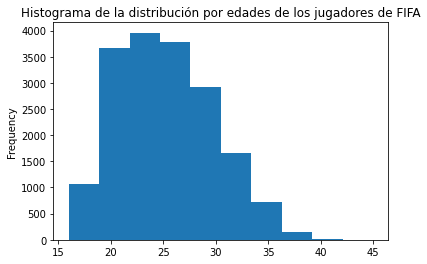

In [ ]:
# Hitograma de "Age"

fifa_df["Age"].plot.hist(bins=10)
plt.title("Histograma de la distribución por edades de los jugadores de FIFA")
plt.show()

### Gráfica de Pie (Preferred Foot)

Selecciónes el conteo de valores del pie preferido (columna ```Preferred Foot```) y muestra la información mediante una gráfica de Pie:

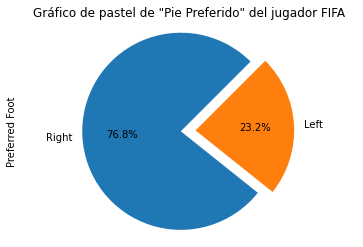

In [ ]:
# Porcentaje de pie preferido en gráfica de pie.

fifa_df["Preferred Foot"].value_counts().plot.pie(startangle=45, autopct = '%1.1f%%', explode = (0.05, 0.1))
plt.axis('equal') 
plt.title('Gráfico de pastel de "Pie Preferido" del jugador FIFA')
plt.show()


### Gráfica de dispersión Edad vs Potential left

Ahora, utiliza una gráfica de dispersión para visualizar el comportamiento del potencial por alcanzar (```Potential left```) de acuerdo a las edades de los jugadores:

*Tip: La gráfica debe mostrar la edad en un eje y el potencial por alcanzar en el otro.*

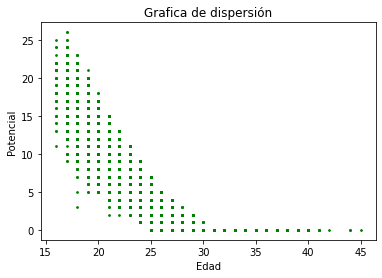

In [ ]:
fifa_df.plot.scatter(x = "Age", y = "Potential_left", s=3, color = 'g')
plt.title('Grafica de dispersión')
plt.xlabel("Edad")
plt.ylabel("Potencial")
plt.show()

¿Qué otras variables o mezcla de variables sería interesante visualizar?

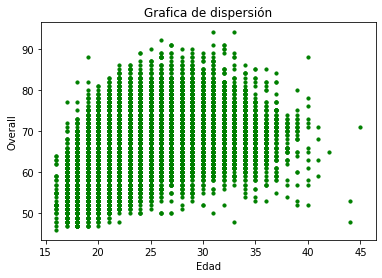

In [ ]:
fifa_df.plot.scatter(x="Age", y= "Overall", s=10, c='g')
plt.title('Grafica de dispersión')
plt.xlabel("Edad")
plt.ylabel("Overall")
plt.show()

# Desafío Adicional

En la práctica con Numpy, creaste un modelo para identificar imágenes de dígitos escritos a mano. 

Para este nuevo conjunto de datos, ¿podrías usar una metodología similar para encontrar la posición en el campo de un jugador solamente usando los valores de su habilidades? 

Skills: ```Shooting 	Defense 	Passing 	Physical 	Control 	Mental 	GoalKeeping```

In [ ]:
# Fetch the dataset using the raw GitHub URL.
!curl --remote-name \
     -H 'Accept: application/vnd.github.v3.raw' \
     --location https://raw.githubusercontent.com/DCDPUAEM/DCDP/main/01%20Programaci%C3%B3n%20en%20Python/data/fifa/positions.csv

positions_df = pd.read_csv("positions.csv", header=0, skipinitialspace=True)
positions_df.shape

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   772  100   772    0     0  15755      0 --:--:-- --:--:-- --:--:-- 15755


(36, 2)

In [ ]:
import numpy as np
positions_df["Position"] = positions_df["Full"] + " (" + positions_df["Abbreviation"] +")"
#positions_df.reset_index()
positions_df["Indx_Position"]=np.arange(36)
positions_df.head(3)

,Abbreviation,Full,Position,Indx_Position
0,GK,Goalkeeper,Goalkeeper (GK),0
1,SW,Sweeper,Sweeper (SW),1
2,CB,Center Back,Center Back (CB),2


In [ ]:
skills_df=fifa_df[["Name","Position", "Shooting", "Defense", "Passing", "Physical", "Control", "Mental", "GoalKeeping"]]
skills_df.head()

,Name,Position,Shooting,Defense,Passing,Physical,Control,Mental,GoalKeeping
0,L. Messi,Right Forward (RF),86.0,41.0,87.0,80.0,96.0,95.0,11.0
1,D. Mertens,Right Forward (RF),74.0,46.0,78.0,77.0,91.0,84.0,8.0
2,D. Valeri,Right Forward (RF),79.0,46.0,78.0,69.0,78.0,82.0,12.0
3,L. Podolski,Right Forward (RF),80.0,49.0,73.0,73.0,75.0,78.0,11.0
4,C. Ciano,Right Forward (RF),70.0,32.0,72.0,72.0,77.0,72.0,9.0


In [ ]:
merged_skills_df = skills_df.merge(positions_df, how="inner", left_on="Position", right_on="Position")

In [ ]:
skills_df=merged_skills_df.drop(["Full"], axis=1)
skills_df=merged_skills_df[["Name", "Indx_Position", "Position", "Abbreviation", "Shooting", "Defense", "Passing", "Physical", "Control", "Mental", "GoalKeeping"]]
skills_df.head()
#skills_df.groupby("Indx_Position").mean().head()

,Name,Indx_Position,Position,Abbreviation,Shooting,Defense,Passing,Physical,Control,Mental,GoalKeeping
0,L. Messi,29,Right Forward (RF),RF,86.0,41.0,87.0,80.0,96.0,95.0,11.0
1,D. Mertens,29,Right Forward (RF),RF,74.0,46.0,78.0,77.0,91.0,84.0,8.0
2,D. Valeri,29,Right Forward (RF),RF,79.0,46.0,78.0,69.0,78.0,82.0,12.0
3,L. Podolski,29,Right Forward (RF),RF,80.0,49.0,73.0,73.0,75.0,78.0,11.0
4,C. Ciano,29,Right Forward (RF),RF,70.0,32.0,72.0,72.0,77.0,72.0,9.0


In [ ]:
#MIO

"""
y = skills_df["Indx_Position"]
X = skills_df[["Shooting", "Defense", "Passing", "Physical", "Control", "Mental", "GoalKeeping"]]
X.shape, y.shape
"""

((17918, 7), (17918,))

In [ ]:
# Estructura de datos
y = np.array(fifa_df["Position"])
X = np.array(fifa_df[["Shooting", "Defense", "Passing", "Physical", "Control", "Mental", "GoalKeeping"]])
print(X.shape)
print(y.shape)

(17918, 7)
(17918,)


In [ ]:
# randomly initializing K centroid by picking K samples from X
def initialize_random_centroids(K, X):
    """Initializes and returns k random centroids"""
    m, n = np.shape(X)
    # a centroid should be of shape (1, n), so the centroids array will be of shape (K, n)
    centroids = np.empty((K, n))
    for i in range(K):
        # pick a random data point from X as the centroid
        centroids[i] =  X[np.random.choice(range(m))] 
    return centroids

In [ ]:
centroids=initialize_random_centroids(K=27, X=X)

In [ ]:
# MIO
"""
import numpy as np

def count_class_examples(y):
  """Imprime el numero de ejemplos para cada clase en y.
  
  Argumentos
  y - arreglos de numpy que contiene etiquetas
  """
  y=skills_df["Indx_Position"]
  count=0
  for i in range(36):
    count = np.size(np.where(y==i))
    print("Numero de jugadores en la  posición ", i, count)

"""

In [ ]:
#count_class_examples(y)

CALCULAR EL ARREGLO REPRESENTATIVO PARA CADA POSICION 

In [ ]:
"""
from numpy.ma.core import empty_like
def class_means(X, y):
  """
  Calcula el arreglo promedio (representativo) de cada clase
  """
  # Numero de ejemplos (filas)
  m = X.shape[0]
  # Numero de features (columnas)
  n = X.shape[1]
  # Clases distintas en el set
  ulabels = np.unique(y)
  # Numero de clases
  classes = ulabels.size

  # Rellena means con el arreglo promedio de cada clase
  means = np.empty((classes, n))

  for i in range(classes):
    means[i,:] =X[y==ulabels[i]].mean(axis=0) 

  return means

"""

In [ ]:
"""
class_representatives = class_means(X, y)

#shape del arreglo que contiene los representativos
class_representatives.shape

"""

(27, 7)

In [ ]:
"""
assert np.array_equal(class_means(np.array([[4, 6], [2, 4], [10, 4], [2, 6]]), np.array([1, 2, 1, 2])), np.array([[7, 5], [2, 5]])), "Error"
assert class_representatives.shape == (27, 7), "Error en las dimensiones de class_representatives"
print("Funcion class_means es correcta")
"""

Funcion class_means es correcta


Distancia Euclidiana

In [ ]:
def euclidean_distance(x1, x2):
  """
  Calcula la distancia euclidiana entre los elementos de P y Q
  """
  e_distance = np.sqrt(np.sum(np.power(x1-x2, 2))) 
  #e_distance = np.sqrt(np.sum((P-Q)**2, axis=0)) 
  #e_distance = np.sqrt((P.sub(Q,axis=0)).pow(2).sum())
  return e_distance

In [ ]:
"""
a = np.array([[1, 2, 3]])
b = np.array([[3, 3, 5]])
euclidean_distance(a, b)
"""

In [ ]:
#assert euclidean_distance(np.array([[1, 2, 3]]), np.array([[3, 3, 5]]))[0] == 3.0, "Error en euclidean_distance"

Obten el representante más cercano para cada ejemplo

In [ ]:
"""
def closest_point(X, representatives):
  """
  Devuelve un arreglo con la etiqueta del elemento mas cercano
  para cada ejemplo en X

  X -  el arreglo con los ejemplos
  representatives - el arreglo con los elementos representativos de cada clase
  """
  # Numero de ejemplos (filas)
  m = X.shape[0]
  # Numero de features (columnas)
  n = X.shape[1]
  # Numero de clases
  classes = representatives.shape[0]

  # Distancias minimas
  min_distances = np.full(m, np.inf)
  # El indice de la mejor distancia
  best = np.zeros((X.shape[0]), dtype=np.int8)



  #distancia
  c=np.reshape(representatives, (classes, 1,n)) 
  best=np.argmin(np.sqrt(np.sum((X-c)**2, axis=2)),axis=0)
  
  return best

  """

IndentationError: ignored

In [ ]:
def closest_centroid(x, centroids, K):
    """Finds and returns the index of the closest centroid for a given vector x"""
    distances = np.empty(K)
    for i in range(K):
        distances[i] = euclidean_distance(centroids[i], x)
    return np.argmin(distances) # return the index of the lowest distance

In [ ]:
def create_clusters(centroids, K, X):
    """Returns an array of cluster indices for all the data samples"""
    m, _ = np.shape(X)
    cluster_idx = np.empty(m)
    for i in range(m):
        cluster_idx[i] = closest_centroid(X[i], centroids, K)
    return cluster_idx

In [ ]:
def compute_means(cluster_idx, K, X):
    """Computes and returns the new centroids of the clusters"""
    _, n = np.shape(X)
    centroids = np.empty((K, n))
    for i in range(K):
        points = X[cluster_idx == i] # gather points for the cluster i
        centroids[i] = np.mean(points, axis=0) # use axis=0 to compute means across points
    return centroids

In [ ]:
def run_Kmeans(K, X, max_iterations=500):
    """Runs the K-means algorithm and computes the final clusters"""
    # initialize random centroids
    centroids = initialize_random_centroids(K, X)
    # loop till max_iterations or convergance
    print(f"initial centroids: {centroids}")
    for _ in range(max_iterations):
        # create clusters by assigning the samples to the closet centroids
        clusters = create_clusters(centroids, K, X)
        previous_centroids = centroids                                                                                                                                                                                                                                                                                                                                                                                                                                                                              
        # compute means of the clusters and assign to centroids
        centroids = compute_means(clusters, K, X)
        # if the new_centroids are the same as the old centroids, return clusters
        diff = previous_centroids - centroids
        if not diff.any():
            return clusters

    return clusters       

In [ ]:
run_Kmeans(K=27, X=X, max_iterations=5)

initial centroids: [[50. 22. 43. 61. 67. 50.  8.]
 [48. 27. 40. 65. 60. 47.  8.]
 [54. 68. 63. 70. 69. 65. 11.]
 [56. 57. 52. 69. 65. 62.  9.]
 [43. 59. 52. 67. 57. 50. 10.]
 [31. 57. 43. 61. 50. 52.  9.]
 [16. 16. 20. 53. 31. 39. 67.]
 [31. 58. 52. 49. 50. 62.  9.]
 [55. 64. 59. 72. 68. 63. 10.]
 [62. 35. 67. 75. 76. 70. 10.]
 [57. 54. 58. 66. 61. 64.  7.]
 [37. 56. 47. 71. 61. 46. 12.]
 [36. 42. 44. 57. 52. 48. 11.]
 [41. 59. 59. 70. 65. 53. 11.]
 [36. 60. 37. 65. 46. 50.  9.]
 [48. 29. 55. 72. 71. 56. 11.]
 [58. 39. 61. 74. 75. 65. 10.]
 [35. 60. 52. 54. 47. 55. 11.]
 [66. 40. 68. 71. 79. 65. 11.]
 [76. 50. 82. 74. 82. 83. 10.]
 [31. 68. 62. 66. 62. 58. 11.]
 [58. 47. 48. 71. 67. 66. 12.]
 [54. 70. 64. 64. 64. 67.  9.]
 [34. 61. 50. 62. 39. 49. 10.]
 [17. 14. 23. 51. 32. 42. 57.]
 [41. 49. 45. 69. 48. 40. 11.]
 [49. 65. 68. 71. 68. 65. 14.]]


array([19., 19., 19., ..., 14., 25., 25.])

In [ ]:
from sklearn import datasets
# creating a dataset for clustering
X, y = datasets.make_blobs()
y_preds = run_Kmeans(27, X)

initial centroids: [[ 7.82759123 -3.43792558]
 [-3.89446652 -7.39526235]
 [-3.15872776  2.2954588 ]
 [ 6.27288968 -0.1963266 ]
 [-3.42118543  4.92862518]
 [-4.41378406 -6.00607966]
 [-3.93092867 -6.46432514]
 [-3.60462755  3.01441754]
 [-4.85097779 -4.41191613]
 [ 8.17042217 -3.74549927]
 [ 6.87442969 -2.37782604]
 [-2.87525553 -5.98950372]
 [ 8.19593078 -3.55473129]
 [-2.44206842  2.23936852]
 [-5.04359633 -5.11175289]
 [-5.04359633 -5.11175289]
 [-1.97497647  3.3122666 ]
 [ 6.81447522 -3.15030087]
 [-4.52807793 -7.12909673]
 [ 6.88131896 -3.7519762 ]
 [-5.30470142  3.53852904]
 [-4.92616629 -4.81547924]
 [ 7.07542722 -1.13180447]
 [-2.08345249 -4.91200299]
 [-3.94515306  2.76040579]
 [-2.00475417  3.09532533]
 [-3.49737626  5.03710129]]


/usr/local/lib/python3.8/dist-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.8/dist-packages/numpy/core/_methods.py:181: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(


In [1]:
def accuracy(y, y_preds):
  """
  Devuelve la exactitud dados dos vectores "y" con la verdad
  y "y_pred" con las predicciones
  """
  
  #acc=np.sum(y==y_pred)/y.size


 
  m=y.shape[0] #número de ejemplos 
  acc =(y==y_preds).sum()/(m)
  
 
  return acc

In [ ]:
accuracy(y, y_preds)

0.33

In [ ]:
#y_pred = closest_point(X, class_representatives)

ValueError: ignored

In [ ]:
assert y_pred.shape == (20000,) or y_pred.shape == (20000), "Error en las dimensiones de y_pred"

Visualiza las predicciones

In [ ]:
y_pred.shape

(17918,)

Exactitúd (Accuracy)

In [ ]:
def accuracy(y, y_pred):
  """
  Devuelve la exactitud dados dos vectores "y" con la verdad
  y "y_pred" con las predicciones
  """
  
  #acc=np.sum(y==y_pred)/y.size


 
  m=y.shape[0] #número de ejemplos 
  acc =(y==y_pred).sum()/(m)
  
 
  return acc

In [ ]:
accuracy(y, y_pred)

0.0